<a href="https://colab.research.google.com/github/Swapnil-417/Cardiovascular-Risk-Prediction/blob/main/Cardiovascular_Risk_Prediction_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Predicting whether the patient has a 10-year risk of future coronary heart disease (CHD) </u></b>

# **Problem Description**

### The dataset is from an ongoing cardiovascular study on residents of the town of Framingham, Massachusetts. The classification goal is to predict whether the patient has a 10-year risk of future coronary heart disease (CHD). The dataset provides the patient’s information. It includes over 4,000 records and 15 attributes. Each attribute is a potential risk factor. There are both demographic, behavioral, and medical risk factors.

# **Data Description**

**Demographic:**
* **Sex**: male or female("M" or "F")
* **Age**: Age of the patient;(Continuous - Although the recorded ages have been truncated to whole numbers, the concept of age is continuous)

**Behavioral**
* **is_smoking**: whether or not the patient is a current smoker ("YES" or "NO")
* **CigsPerDay**: the number of cigarettes that the person smoked on average in one day.(can be considered continuous as one can have any number of cigarettes, even half a cigarette.)

**Medical(history)**
* **BPMeds**: whether or not the patient was on blood pressure medication (Nominal)
* **PrevalentStroke**: whether or not the patient had previously had a stroke (Nominal)
* **PrevalentHyp**: whether or not the patient was hypertensive (Nominal)
* **Diabetes**: whether or not the patient had diabetes (Nominal)

**Medical(current)**
* **TotChol**: total cholesterol level (Continuous)
* **SysBP**: systolic blood pressure (Continuous)
* **DiaBP**: diastolic blood pressure (Continuous)
* **BMI**: Body Mass Index (Continuous)
* **HeartRate**: heart rate (Continuous - In medical research, variables such as heart rate though in fact discrete, yet are considered continuous because of large number of possible values.)
* **Glucose**: glucose level (Continuous)

**Predict variable (desired target)**
* **TenYearCHD**: 10-year risk of coronary heart disease CHD(binary: “1”, means “Yes”, “0” means “No”)

## **Importing Libraries**

In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [53]:
dir_path= "/content/drive/MyDrive/Capstone Projects/Cardiovascular Risk Prediction - Swapnil Patil/data/"
data= pd.read_csv(dir_path + "data_cardiovascular_risk.csv")

# **Data Exploration**

In [54]:
data.head()

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,0,64,2.0,F,YES,3.0,0.0,0,0,0,221.0,148.0,85.0,NaN,90.0,80.0,1
1,1,36,4.0,M,NO,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0
2,2,46,1.0,F,YES,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0
3,3,50,1.0,M,YES,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1
4,4,64,1.0,F,YES,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0


In [55]:
data .tail()

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
3385,3385,60,1.0,F,NO,0.0,0.0,0,0,0,261.0,123.5,79.0,29.28,70.0,103.0,0
3386,3386,46,1.0,F,NO,0.0,0.0,0,0,0,199.0,102.0,56.0,21.96,80.0,84.0,0
3387,3387,44,3.0,M,YES,3.0,0.0,0,1,0,352.0,164.0,119.0,28.92,73.0,72.0,1
3388,3388,60,1.0,M,NO,0.0,NaN,0,1,0,191.0,167.0,105.0,23.01,80.0,85.0,0
3389,3389,54,3.0,F,NO,0.0,0.0,0,0,0,288.0,124.0,77.0,29.88,79.0,92.0,0


In [56]:
data.shape

(3390, 17)

In [57]:
data.columns

Index(['id', 'age', 'education', 'sex', 'is_smoking', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD'],
      dtype='object')

In [58]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3390 entries, 0 to 3389
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               3390 non-null   int64  
 1   age              3390 non-null   int64  
 2   education        3303 non-null   float64
 3   sex              3390 non-null   object 
 4   is_smoking       3390 non-null   object 
 5   cigsPerDay       3368 non-null   float64
 6   BPMeds           3346 non-null   float64
 7   prevalentStroke  3390 non-null   int64  
 8   prevalentHyp     3390 non-null   int64  
 9   diabetes         3390 non-null   int64  
 10  totChol          3352 non-null   float64
 11  sysBP            3390 non-null   float64
 12  diaBP            3390 non-null   float64
 13  BMI              3376 non-null   float64
 14  heartRate        3389 non-null   float64
 15  glucose          3086 non-null   float64
 16  TenYearCHD       3390 non-null   int64  
dtypes: float64(9),

## **Data Inspection**

### **Checking missing values**

In [59]:
# checking for duplicate values
data.duplicated().sum()

0

In [60]:
# checking the columns with missing values
columns_with_missing_values = data.columns[data.isnull().any()]
data[columns_with_missing_values].isnull().sum()

education      87
cigsPerDay     22
BPMeds         44
totChol        38
BMI            14
heartRate       1
glucose       304
dtype: int64

In [61]:
data[data['glucose'].isnull()].head()

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
9,9,55,2.0,F,NO,0.0,0.0,0,1,0,326.0,144.0,81.0,25.71,85.0,NaN,0
10,10,61,1.0,F,NO,0.0,0.0,0,1,0,NaN,185.0,121.0,35.22,80.0,NaN,0
36,36,46,3.0,F,NO,0.0,0.0,0,0,0,193.0,106.5,70.5,26.18,75.0,NaN,0
38,38,41,2.0,F,YES,9.0,1.0,1,1,0,180.0,114.0,70.0,22.41,92.0,NaN,0
55,55,51,2.0,F,NO,0.0,0.0,0,1,0,351.0,134.0,97.5,21.66,100.0,NaN,0


glucose has a relation with diabetes and we will see it

In [62]:
data[data['diabetes']== 0].head()

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,0,64,2.0,F,YES,3.0,0.0,0,0,0,221.0,148.0,85.0,NaN,90.0,80.0,1
1,1,36,4.0,M,NO,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0
2,2,46,1.0,F,YES,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0
3,3,50,1.0,M,YES,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1
4,4,64,1.0,F,YES,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0


In [63]:
data[data['diabetes']== 1].head()

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
77,77,63,1.0,F,NO,0.0,0.0,0,1,1,150.0,152.0,88.0,36.54,72.0,170.0,0
107,107,45,4.0,M,NO,0.0,0.0,0,0,1,189.0,132.0,78.0,28.40,75.0,177.0,0
130,130,63,1.0,M,NO,0.0,0.0,0,0,1,229.0,109.0,75.0,38.42,110.0,120.0,0
134,134,64,1.0,F,NO,0.0,0.0,0,1,1,262.0,147.0,90.0,26.51,85.0,173.0,0
173,173,58,1.0,F,NO,0.0,0.0,1,1,1,267.0,157.0,94.0,33.32,92.0,205.0,1


We can see non-diabetic person has glucose less than 100 whereas diabetic person has glucose above 100. Since, diabetes column do not have any null value so we will use it in filling missing values of glucose column

In [64]:
# mean glucose of non-diabetic person
mean_glu0 = int(data[data['diabetes']== 0]['glucose'].mean())
mean_glu0

79

In [65]:
# mean glucose of diabetic person
mean_glu1 = int(data[data['diabetes']== 1]['glucose'].mean())
mean_glu1

171

In [66]:
# filling null values of glucose column
cond = data['diabetes'] == 1
data['glucose'] = data['glucose'].fillna(cond.map({True:mean_glu1, False: mean_glu0}))

The other features have very few missing entries and could be dropped without losing a lot of data.

In [67]:
# droping missing values
data = data.dropna()

In [68]:
data.isnull().any()

id                 False
age                False
education          False
sex                False
is_smoking         False
cigsPerDay         False
BPMeds             False
prevalentStroke    False
prevalentHyp       False
diabetes           False
totChol            False
sysBP              False
diaBP              False
BMI                False
heartRate          False
glucose            False
TenYearCHD         False
dtype: bool

There are no any missing values present in the dataset. Also, id column is not so usefull for us so droping it.

In [69]:
new_df = data.drop('id', axis=1)

In [70]:
data.dtypes

id                   int64
age                  int64
education          float64
sex                 object
is_smoking          object
cigsPerDay         float64
BPMeds             float64
prevalentStroke      int64
prevalentHyp         int64
diabetes             int64
totChol            float64
sysBP              float64
diaBP              float64
BMI                float64
heartRate          float64
glucose            float64
TenYearCHD           int64
dtype: object

In [71]:
# change dtypes
data = data.astype({'BPMeds':int, 'education':int, 'cigsPerDay':int})

In [72]:
new_df = new_df.rename(columns={'sex':'gender'})

In [73]:
new_df.head()

,age,education,gender,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
1,36,4.0,M,NO,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0
2,46,1.0,F,YES,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0
3,50,1.0,M,YES,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1
4,64,1.0,F,YES,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0
5,61,3.0,F,NO,0.0,0.0,0,1,0,272.0,182.0,121.0,32.80,85.0,65.0,1


In [74]:
new_df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,3189.0,49.423957,8.556235,32.00,42.00,49.00,56.00,70.0
education,3189.0,1.972719,1.018435,1.00,1.00,2.00,3.00,4.0
cigsPerDay,3189.0,9.098150,11.864621,0.00,0.00,0.00,20.00,70.0
BPMeds,3189.0,0.029476,0.169164,0.00,0.00,0.00,0.00,1.0
prevalentStroke,3189.0,0.005958,0.076970,0.00,0.00,0.00,0.00,1.0
prevalentHyp,3189.0,0.313264,0.463894,0.00,0.00,0.00,1.00,1.0
diabetes,3189.0,0.025400,0.157361,0.00,0.00,0.00,0.00,1.0
totChol,3189.0,236.968642,44.537998,113.00,206.00,234.00,264.00,600.0
sysBP,3189.0,132.436344,22.176848,83.50,117.00,128.00,143.50,295.0
diaBP,3189.0,82.841173,11.993650,48.00,74.50,82.00,89.50,142.5


From statistical overview of the dataset, we infer that some data features are binary, whereas other features are continuous. Further, the minimum and maximum values for some features, notably for 'totChol' and 'sysBP'. This suggests the presence of outliers in the data.

### **Checking Outliers**

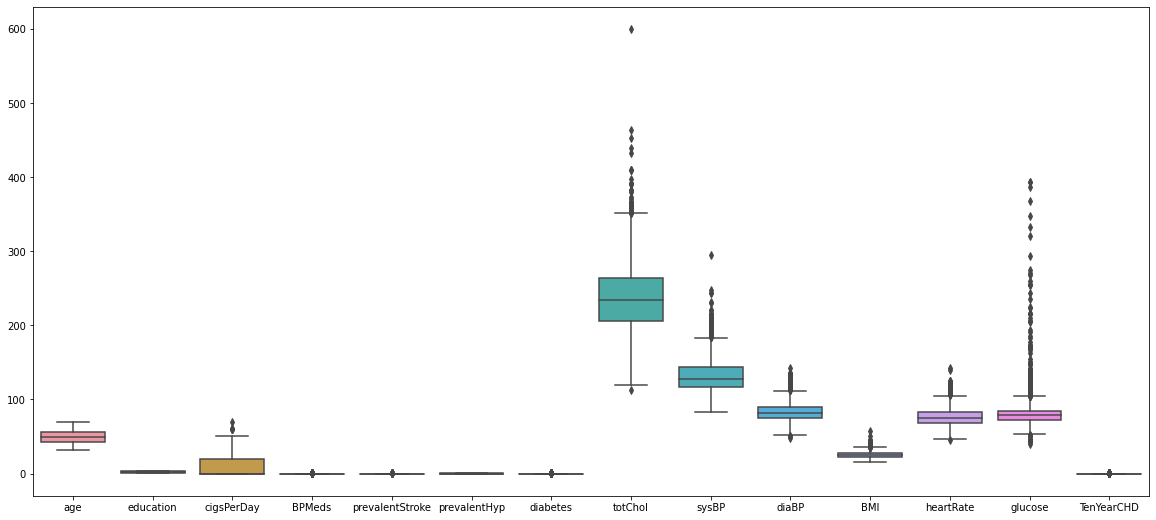

In [75]:
plt.figure(figsize=(20,9))
sns.boxplot(data= new_df)
plt.show()

WE can see there are outliers in some features but they will be usefull so we drop extreme outliers from 'totChol' and 'sysBP' columns.

In [76]:
# droping outliers from totChol column above 500
new_df= new_df[new_df['totChol'] < 500]

In [77]:
# droping outliers from sysBP column above 250
new_df= new_df[new_df['sysBP'] < 250]

# **Exploratory Data Analysis**

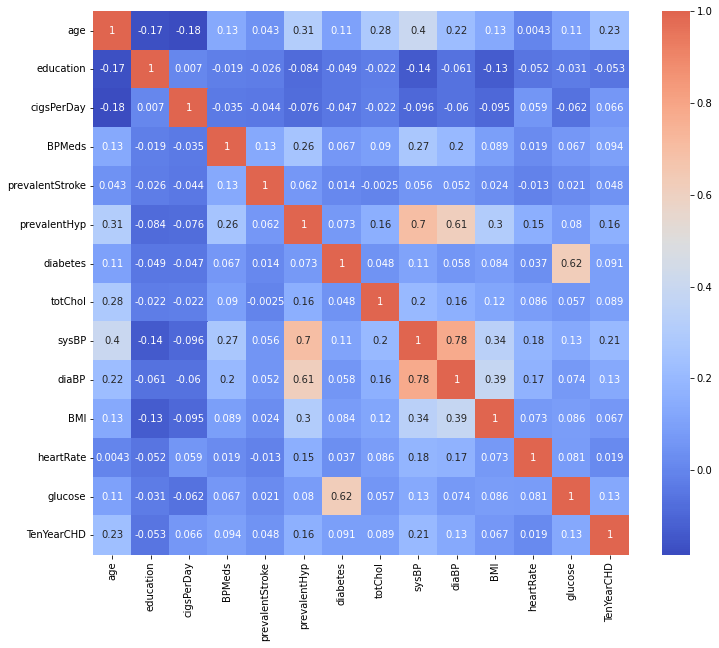

In [78]:
fig, axes = plt.subplots(1,1,figsize=(12,10))
sns.heatmap(new_df.corr(), annot=True, cmap='coolwarm', ax=axes, center=0.5)
plt.show()

In [79]:
cont_var= ['age','cigsPerDay','totChol','sysBP','diaBP','BMI','heartRate','glucose']
cat_var= ['gender','is_smoking']
bin_var= ['BPMeds','prevalentStroke','prevalentHyp','diabetes']
target= 'TenYearCHD'

### **Independent Variables**

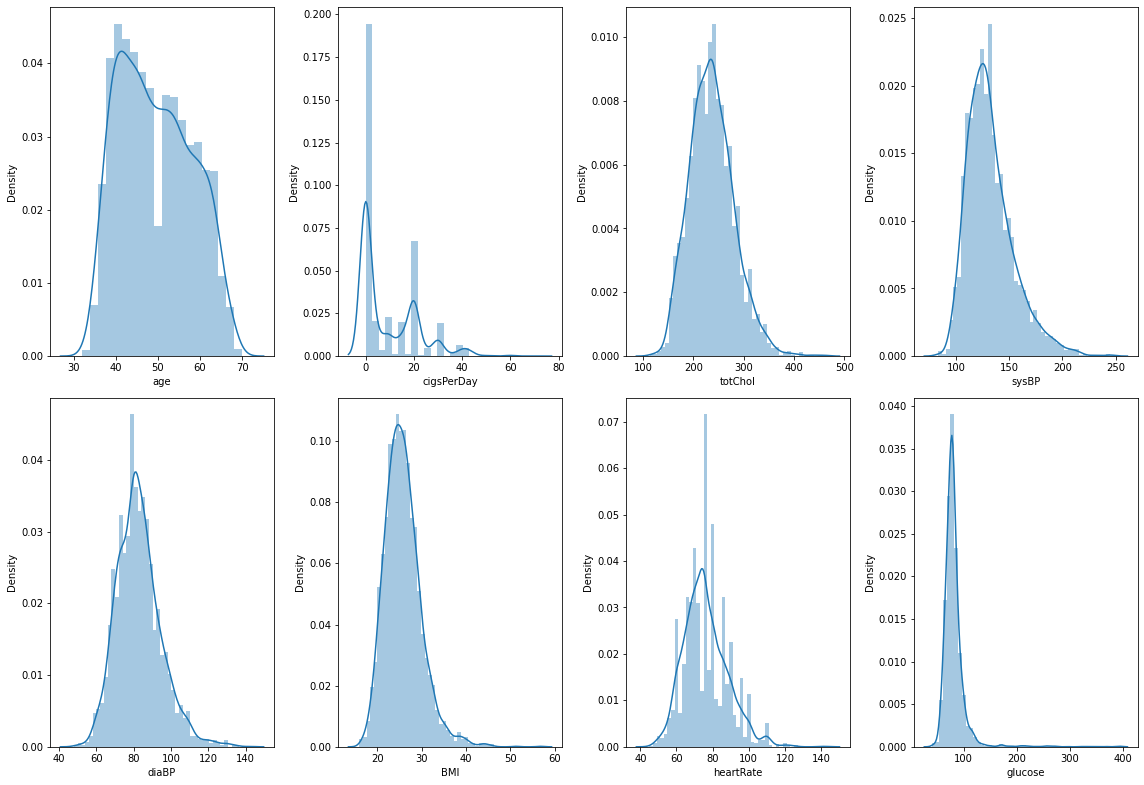

In [80]:
# check distribution
def check_dist(df):
    l = df.columns.values
    number_of_columns=(len(l))/2
    number_of_rows = 2
    
    plt.figure(figsize=(4*number_of_columns,8*number_of_rows))
    for i in range(1,len(l)+1):
        plt.subplot(number_of_rows+1,number_of_columns,i)
        sns.distplot(df[l[i-1]],kde=True) 
        plt.tight_layout()
        
check_dist(new_df[cont_var])

## **Bivariate Analysis**

### **Categorical Variables**

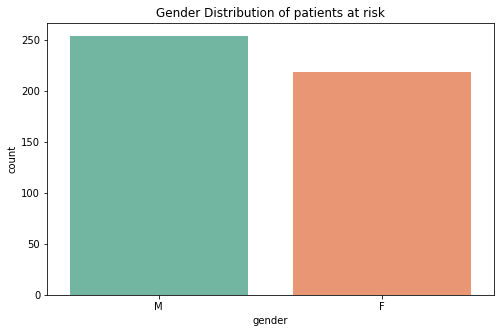

In [81]:
# which gender has most risk of CHD
temp_df= new_df[new_df['TenYearCHD']==1]

fig, ax = plt.subplots(figsize=(8,5))
ax = sns.countplot(x='gender', data=temp_df, palette='Set2')
ax.set_title("Gender Distribution of patients at risk")
plt.show()

According to this dataset, males have shown a slightly higher risk of coronary heart disease.

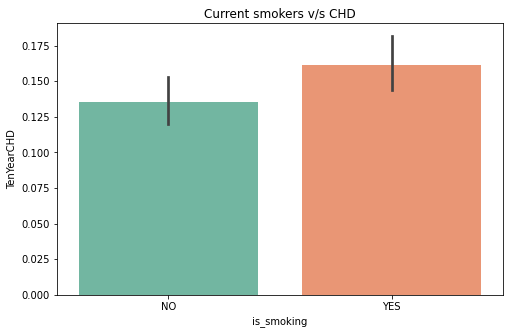

In [82]:
# Does smokers have risk of CHD
fig, ax = plt.subplots(figsize=(8,5))
ax = sns.barplot(x='is_smoking',y='TenYearCHD', data=new_df, palette='Set2')
ax.set_title("Current smokers v/s CHD")
plt.show()

Current smokers have high risk of contracting coronary heart disease than non smokers.

### **Continuous Variables**

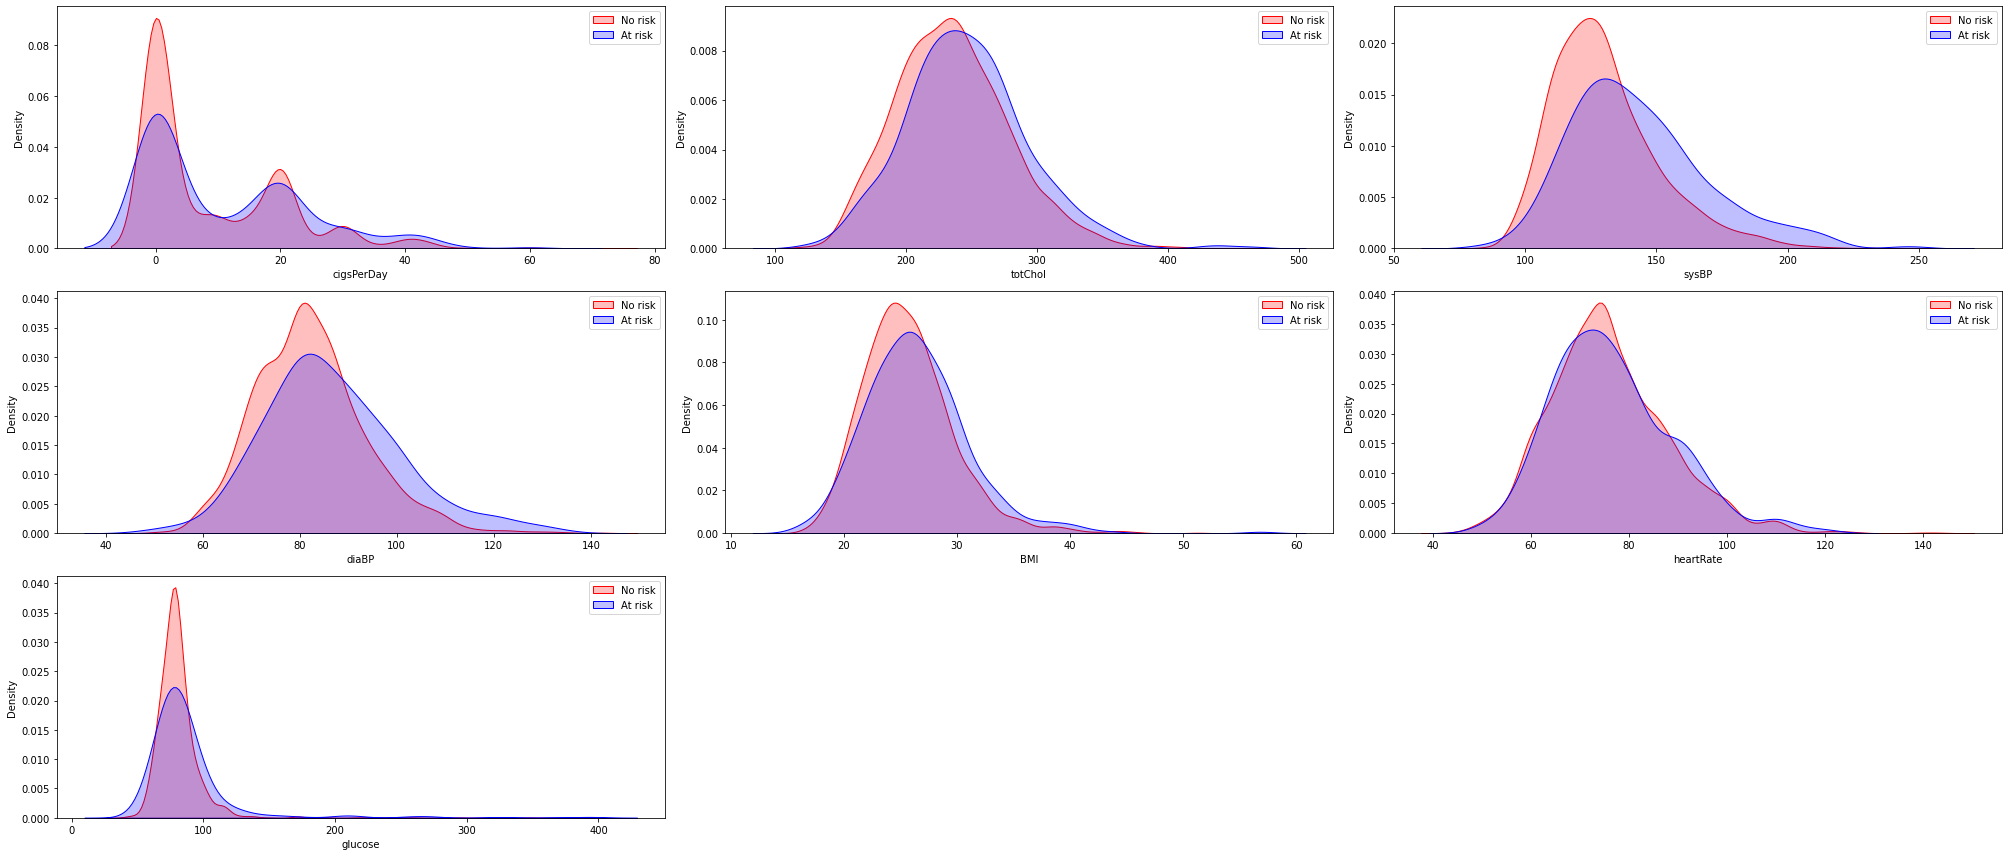

In [83]:
# Which continuous variables are risk factors
l = cont_var
number_of_columns=(len(l)-1)/2
number_of_rows = 2

plt.figure(figsize=(8*number_of_columns,6*number_of_rows))
for i in range(1,len(l)):
    plt.subplot(number_of_rows+1,number_of_columns,i)
    fig = sns.kdeplot(new_df[l[i]][new_df['TenYearCHD'] == 0], shade=True, color="r", label='No risk')
    fig = sns.kdeplot(new_df[l[i]][new_df['TenYearCHD'] == 1], shade=True, color="b",label='At risk')
    plt.legend()
    plt.tight_layout()

There is no direct correlation of coronary heart disease with the cholestrol, BMI, heartrate and glucose.

Patients having higher systolic pressure tends to have high risk of Coronary heart disease.

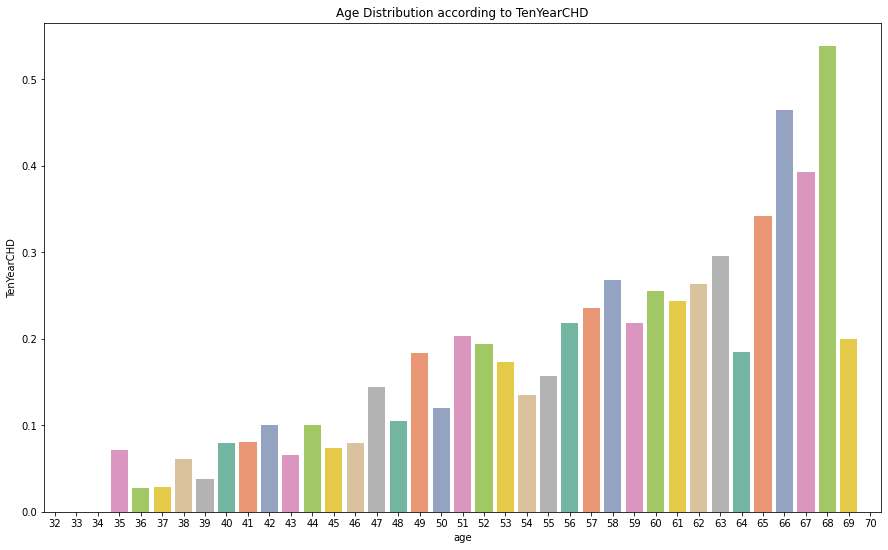

In [84]:
# which age has most risk
temp1_df= new_df.groupby("age", as_index=False).TenYearCHD.mean()

fig, ax = plt.subplots(figsize=(15,9))
ax = sns.barplot(x='age', y='TenYearCHD', data=temp1_df, palette='Set2')
ax.set_title("Age Distribution according to TenYearCHD")
plt.show()

The average of diseased patients increases with increasing age. The peoples of age above 55 have high risk of contracting disease and the risk increases with age.

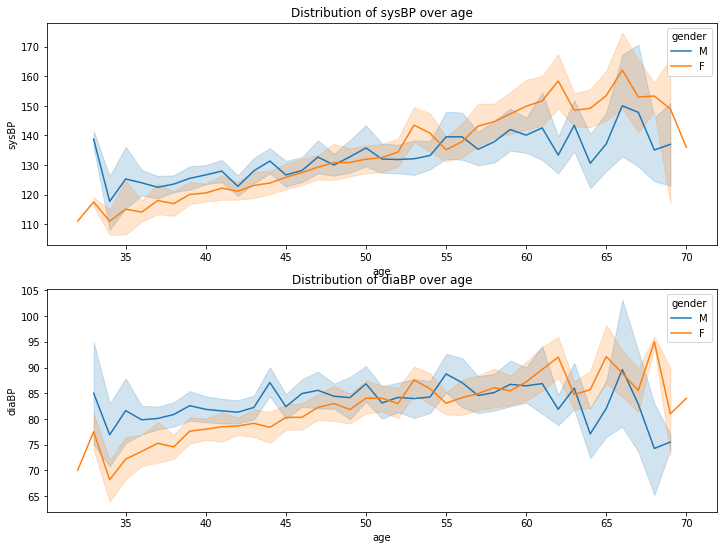

In [85]:
# Distribution of sysBP and diaBP over age in relation to gender
plt.subplots(figsize=(12, 9))

plt.subplot(2,1,1)
sns.lineplot(data=new_df, x="age", y='sysBP', hue="gender")
plt.title("Distribution of sysBP over age")

plt.subplot(2,1,2)
sns.lineplot(data=new_df, x="age", y='diaBP', hue="gender")
plt.title("Distribution of diaBP over age")

plt.show()

Womens of above 50 age have higher systolic BP as compared to men thus increasing risk of disease.

### **Binary Variables**

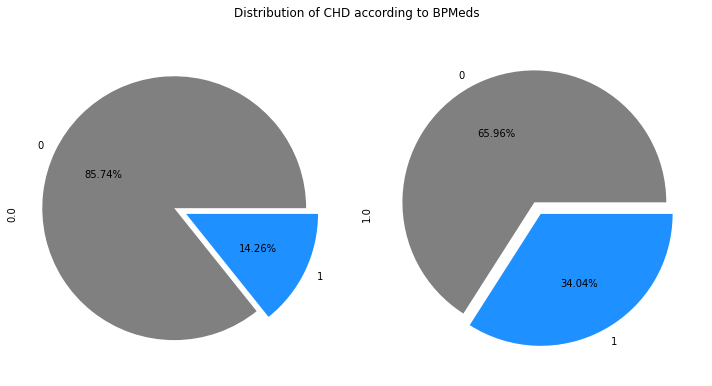

In [86]:
# Risk of CHD to a patient on BP medication
bp_df= new_df.groupby(['BPMeds', 'TenYearCHD']).size().reset_index().pivot(
                            columns='BPMeds', index='TenYearCHD', values=0)

colors = ['grey', 'dodgerblue']
bp_df.plot(kind='pie', subplots=True, figsize=(10,6), colors=colors,
           autopct='%.2f%%', explode=[0.1,0], legend=False)

plt.suptitle("Distribution of CHD according to BPMeds")
plt.tight_layout()
plt.show()

The risk of getting Coronary Heart Disease for a patient on BP medication is 34% whereas, a patient having no BP medication has only 14% of risk.

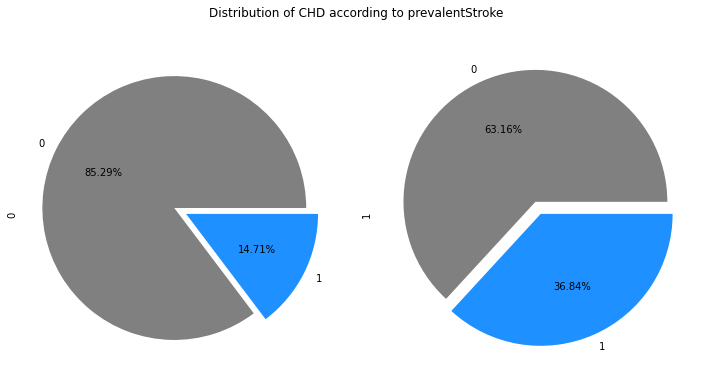

In [87]:
# Risk of CHD to a patient previously had a stroke
prevstroke_df= new_df.groupby(['prevalentStroke', 'TenYearCHD']).size().reset_index().pivot(
                                    columns='prevalentStroke', index='TenYearCHD', values=0)

prevstroke_df.plot(kind='pie', subplots=True, figsize=(10,6), colors=colors,
           autopct='%.2f%%', explode=[0.1,0], legend=False)

plt.suptitle("Distribution of CHD according to prevalentStroke")
plt.tight_layout()
plt.show()

The risk of getting Coronary Heart Disease for a patient previously had a stroke is 37% whereas, a patient with no previous stroke has 15% of risk.

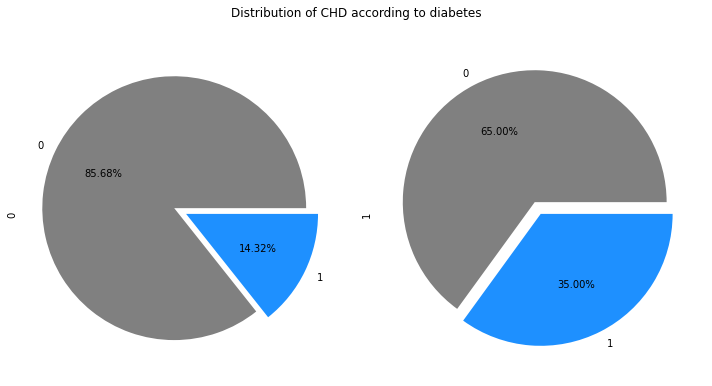

In [88]:
# Risk of CHD to a diabetic patient 
diabetes_df= new_df.groupby(['diabetes', 'TenYearCHD']).size().reset_index().pivot(
                                    columns='diabetes', index='TenYearCHD', values=0)

diabetes_df.plot(kind='pie', subplots=True, figsize=(10,6), colors=colors,
           autopct='%.2f%%', explode=[0.1,0], legend=False)

plt.suptitle("Distribution of CHD according to diabetes")
plt.tight_layout()
plt.show()

The risk of getting Coronary Heart Disease to a diabetic patient is 35% whereas, non-diabetic patient has only 14% of risk.

## **Analyzing Dependent Variable**

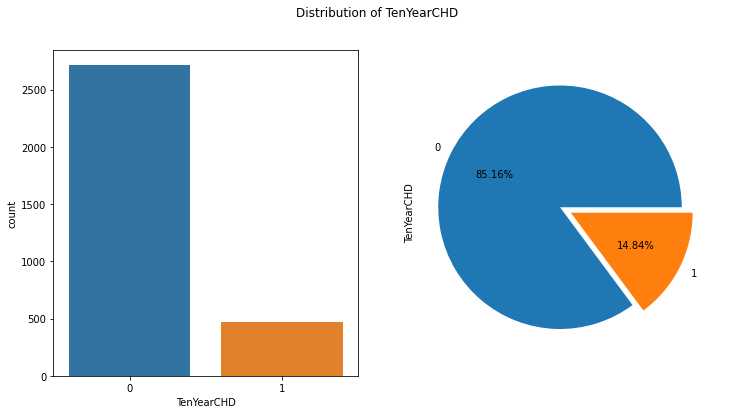

In [89]:
# Distribution of target variable
plt.subplots(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.countplot(x=new_df[target])

plt.subplot(1, 2, 2)
new_df[target].value_counts().plot.pie(autopct='%1.2f%%', explode=[0.1,0])

plt.suptitle("Distribution of TenYearCHD")
plt.show()

The distribution is highly imbalanced. We can see, the count of patients at risk is very less as compared to no risk patients. This would lead to class imbalance problem while fitting our models.

Let's see how unbalanced the dataset is:

Class 0: 2714
Class 1: 473
Proportion: 5.74 : 1


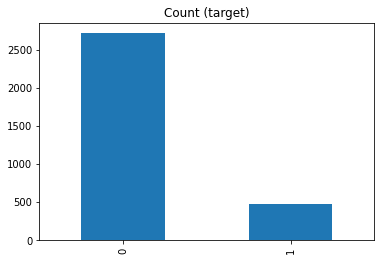

In [90]:
target_count = new_df[target].value_counts()
print('Class 0:', target_count[0])
print('Class 1:', target_count[1])
print('Proportion:', round(target_count[0] / target_count[1], 2), ': 1')

target_count.plot(kind='bar', title='Count (target)');

### **Resampling**

Resampling the data using Random over-sampling method to overcome the class imbalance problem.

In [91]:
# Class count
count_class_0, count_class_1 = new_df[target].value_counts()

# Divide by class
df_class_0 = new_df[new_df[target] == 0]
df_class_1 = new_df[new_df[target] == 1]

Random over-sampling:
0    2714
1    2714
Name: TenYearCHD, dtype: int64


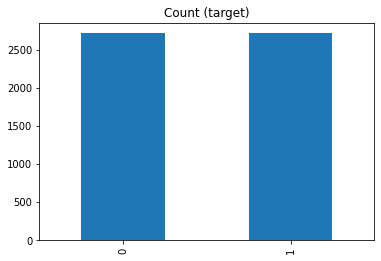

In [92]:
df_class_1_over = df_class_1.sample(count_class_0, replace=True)
sampled_df = pd.concat([df_class_0, df_class_1_over], axis=0)

print('Random over-sampling:')
print(sampled_df[target].value_counts())

sampled_df[target].value_counts().plot(kind='bar', title='Count (target)');

In [93]:
sampled_df.head()

,age,education,gender,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
1,36,4.0,M,NO,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0
2,46,1.0,F,YES,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0
4,64,1.0,F,YES,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0
6,61,1.0,M,NO,0.0,0.0,0,1,0,238.0,232.0,136.0,24.83,75.0,79.0,0
7,36,4.0,M,YES,35.0,0.0,0,0,0,295.0,102.0,68.0,28.15,60.0,63.0,0


In [96]:
sampled_df.reset_index(drop= True, inplace= True)

In [97]:
sampled_df.shape

(5428, 16)

# **Feature Engineering**

In [98]:
sampled_df.head()

,age,education,gender,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,36,4.0,M,NO,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0
1,46,1.0,F,YES,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0
2,64,1.0,F,YES,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0
3,61,1.0,M,NO,0.0,0.0,0,1,0,238.0,232.0,136.0,24.83,75.0,79.0,0
4,36,4.0,M,YES,35.0,0.0,0,0,0,295.0,102.0,68.0,28.15,60.0,63.0,0


In [107]:
# Converting categorical data to numeric data
sampled_df['gender'] = sampled_df['gender'].apply(lambda x: 1 if x=='M' else 0)
sampled_df['is_smoking'] = sampled_df['is_smoking'].apply(lambda x: 1 if x=='YES' else 0)

In [108]:
sampled_df.head()

,age,education,gender,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,36,4.0,1,0,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0
1,46,1.0,0,1,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0
2,64,1.0,0,1,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0
3,61,1.0,1,0,0.0,0.0,0,1,0,238.0,232.0,136.0,24.83,75.0,79.0,0
4,36,4.0,1,1,35.0,0.0,0,0,0,295.0,102.0,68.0,28.15,60.0,63.0,0


## **Feature Selection**

Feature selection is a way of selecting the subset of the most relevant features from the original features set by removing the redundant, irrelevant, or noisy features.

**SelectKBest method to select top 10 most important features**

In [110]:
# spliting features and target variable]
X = sampled_df.drop("TenYearCHD", axis=1)
y = sampled_df["TenYearCHD"]

In [111]:
from sklearn.feature_selection import SelectKBest

In [143]:
selector = SelectKBest(k=10)
best_fit = selector.fit(X,y)
vector_names = list(X.columns[selector.get_support(indices=True)])
print(vector_names)

['age', 'gender', 'cigsPerDay', 'BPMeds', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP', 'diaBP', 'glucose']


In [144]:
scores_df = pd.DataFrame(columns=['feature','score'])
scores_df['feature'] = X.columns
scores_df['score'] = best_fit.scores_
print(scores_df.nlargest(10,'score'))

         feature       score
0            age  656.079223
10         sysBP  341.833222
7   prevalentHyp  235.071675
11         diaBP  139.010278
14       glucose   85.544249
9        totChol   77.918290
4     cigsPerDay   71.939739
2         gender   69.108635
5         BPMeds   49.956091
8       diabetes   49.032224


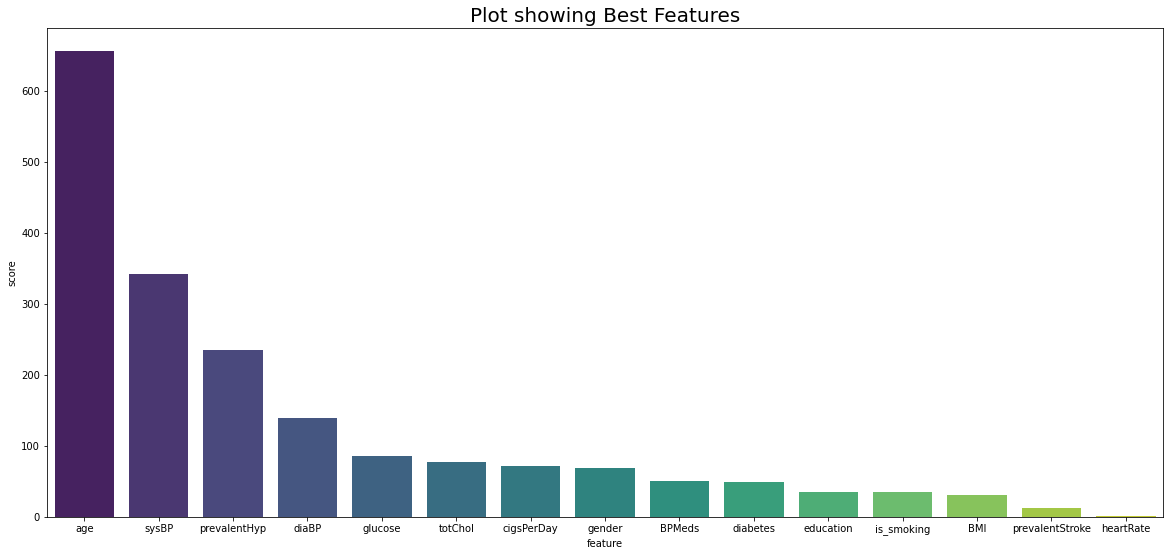

In [145]:
# visualizing feature selection
scores_df=scores_df.sort_values(by="score", ascending=False)
plt.figure(figsize=(20,9), facecolor='w')
sns.barplot(x='feature',y='score',data=scores_df,palette='viridis')
plt.title("Plot showing Best Features", size=20)
plt.show()

In [146]:
best_features = scores_df["feature"].tolist()[:10]

In [147]:
X_best = X[best_features]

In [149]:
X_best.head()

,age,sysBP,prevalentHyp,diaBP,glucose,totChol,cigsPerDay,gender,BPMeds,diabetes
0,36,168.0,1,98.0,75.0,212.0,0.0,1,0.0,0
1,46,116.0,0,71.0,94.0,250.0,10.0,0,0.0,0
2,64,136.5,0,85.0,77.0,241.0,30.0,0,0.0,0
3,61,232.0,1,136.0,79.0,238.0,0.0,1,0.0,0
4,36,102.0,0,68.0,63.0,295.0,35.0,1,0.0,0


## **Train Test Split and Scaling**

In [153]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [152]:
# Spliting into train and test
X_train, X_test, y_train, y_test = train_test_split(X_best, y, test_size=0.3, random_state=1)

In [154]:
# Scaling
scaler = MinMaxScaler()
x_train = scaler.fit_transform(X_train)
x_test = scaler.transform(X_test)

# **Predictive Modeling**